In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df_customers = pd.read_csv('../data_source/customers.csv')
df_loans = pd.read_csv('../data_source/loans.csv')
df_bureau = pd.read_csv('../data_source/bureau_data.csv')

In [ ]:
df_bureau.shape, df_customers.shape, df_loans.shape

In [ ]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(2)

In [ ]:
df = pd.merge(df, df_bureau, on = 'cust_id')
df.head(3)

In [ ]:
df.info()

In [ ]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

In [ ]:
X = df.drop('default', axis = 'columns')
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

## Data Cleaning

In [ ]:
df_train.isna().sum()

In [14]:
df_train['residence_type'].unique()
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [15]:
df_train.residence_type.fillna(mode_residence, inplace = True)
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [16]:
df_test.residence_type.fillna(mode_residence, inplace = True)
df_test.residence_type.unique()

/var/folders/jn/ryblzxz52tsgs4mgrnm0zg9c0000gn/T/ipykernel_3935/1042798983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace = True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
df_train.duplicated().sum()

np.int64(0)

In [19]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

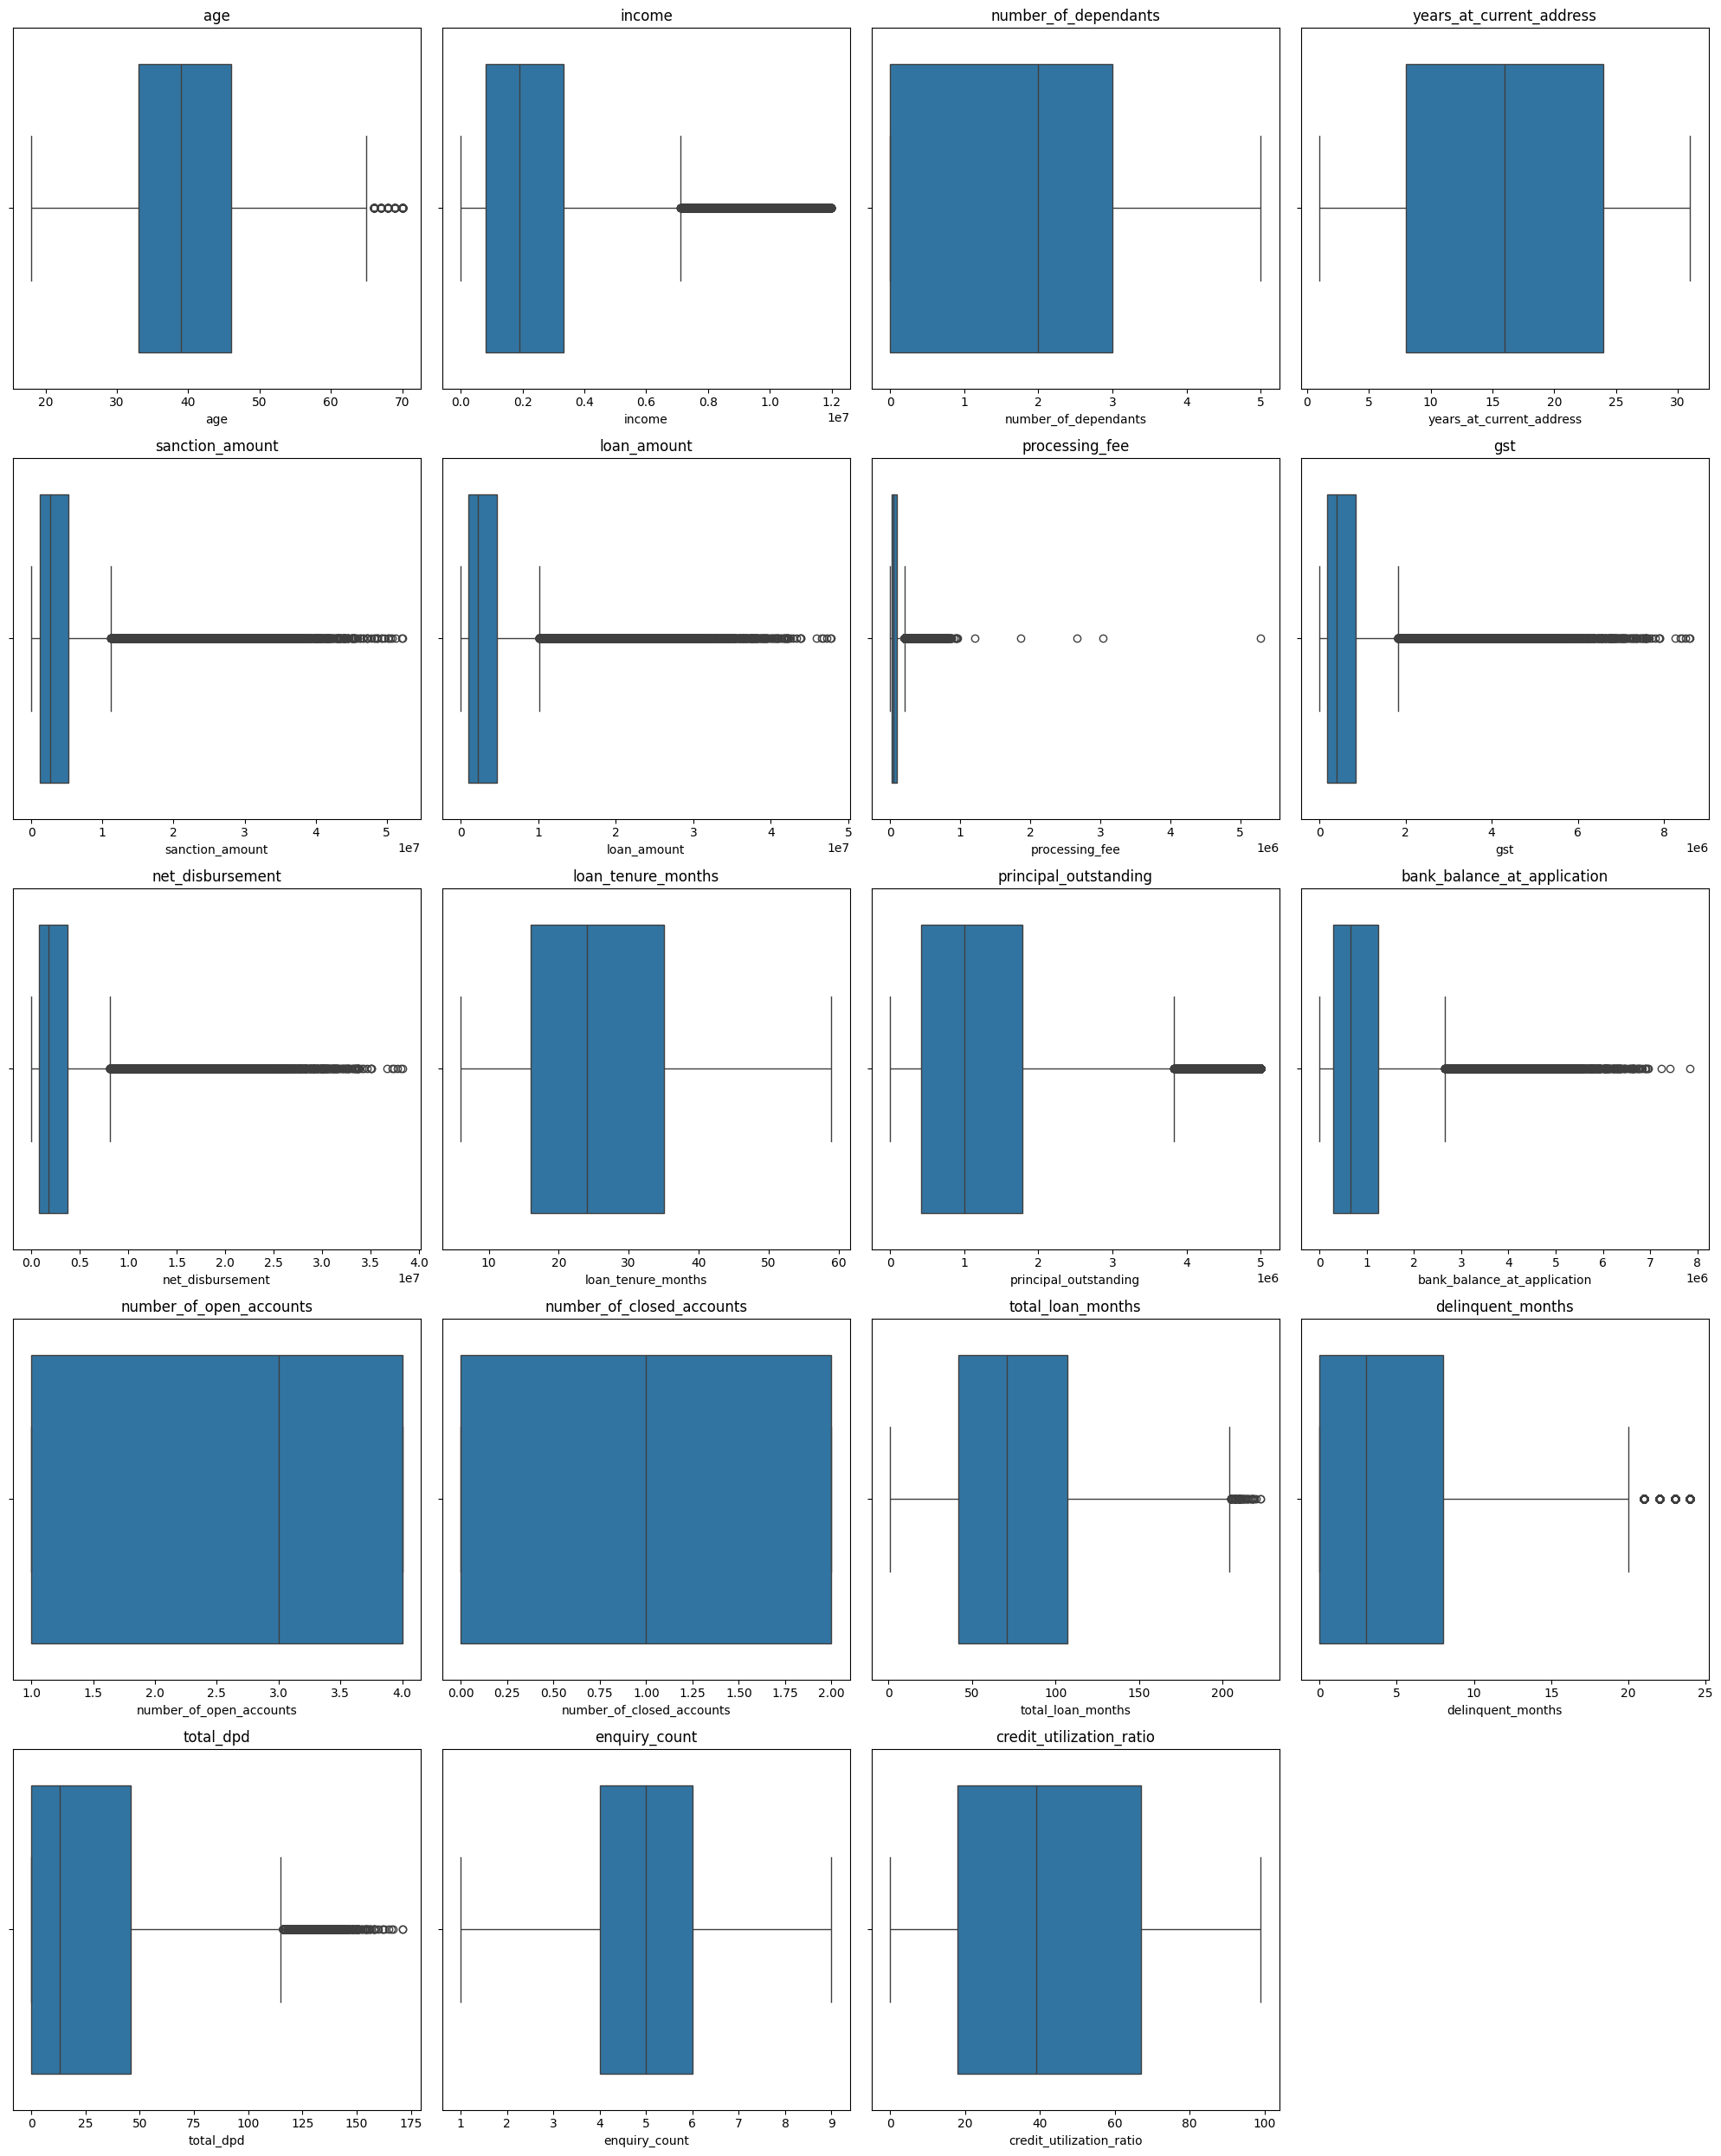

In [20]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

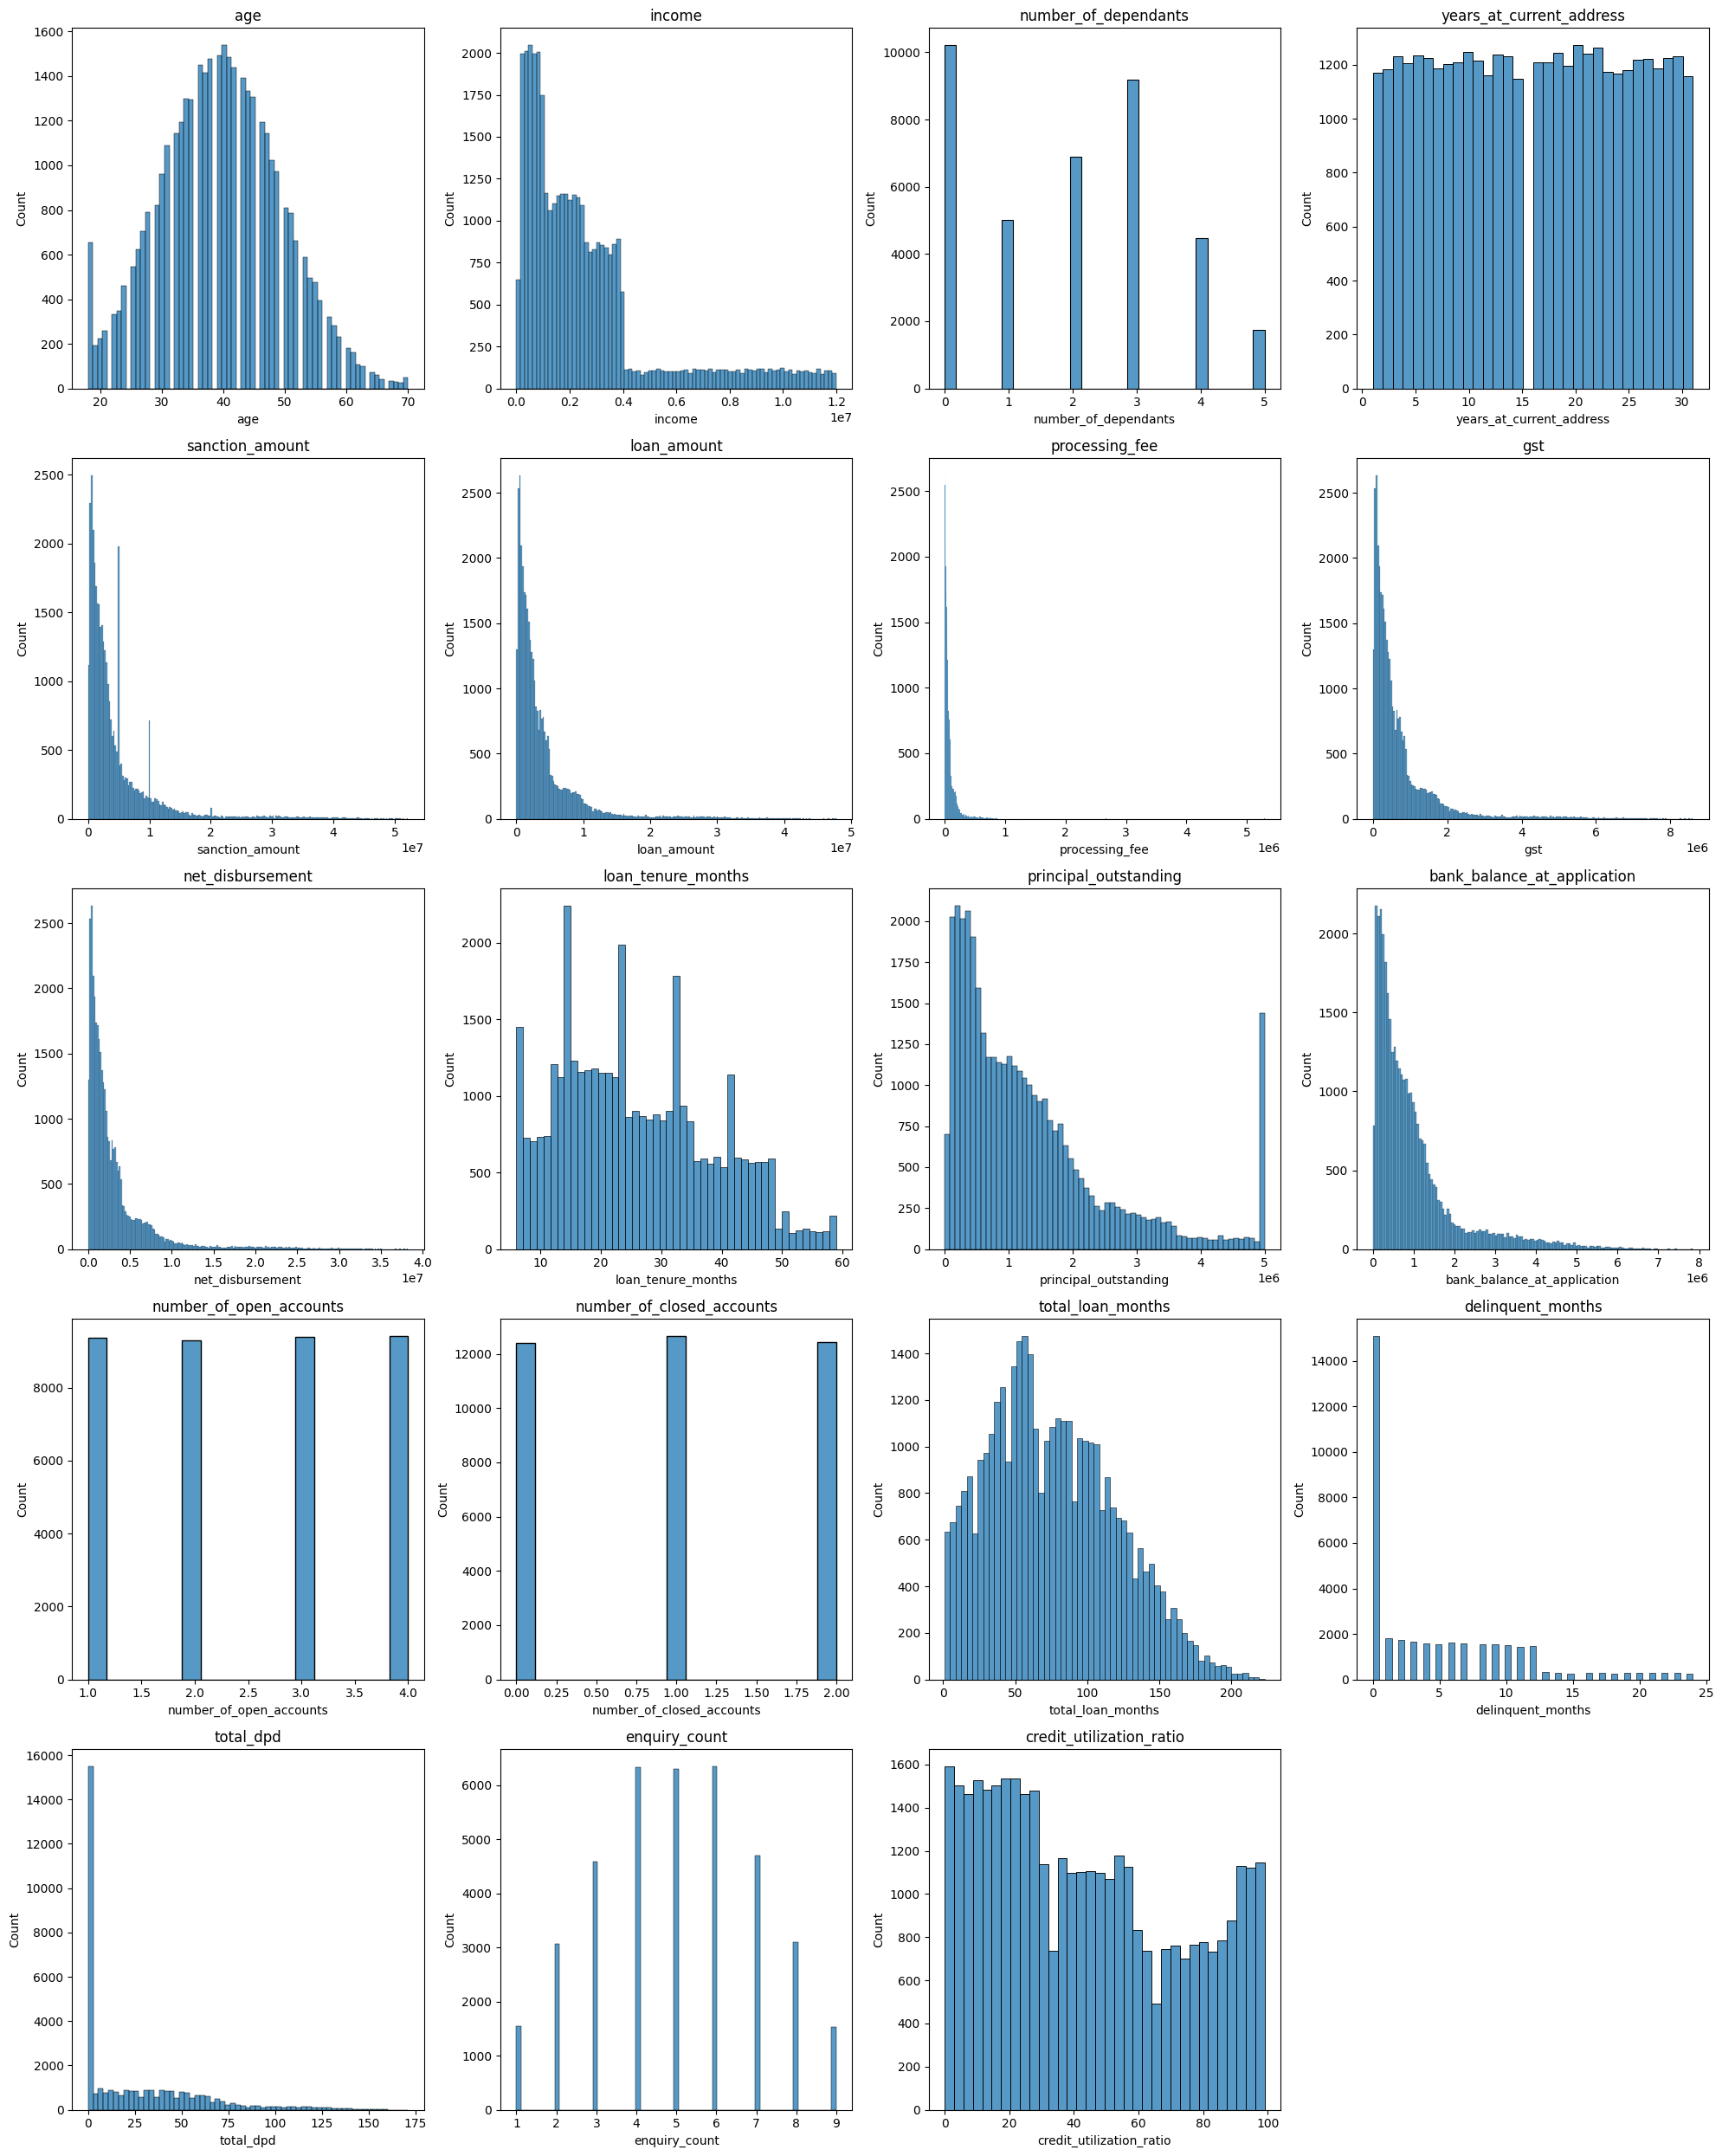

In [21]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [22]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [23]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [27]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
9898      3626000    5.293544e+06

In [28]:
df_train[df_train.processing_fee > df_train.loan_amount][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
23981      2234000    2.669791e+06
28174       966000    1.214493e+06
47089      1738000    1.858965e+06
29305      2616000    3.036378e+06
9898       3626000    5.293544e+06

In [29]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount", "processing_fee"]]

loan_amount  processing_fee
23981      2234000    2.669791e+06
28174       966000    1.214493e+06
47089      1738000    1.858965e+06
29305      2616000    3.036378e+06
9898       3626000    5.293544e+06

In [33]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][["loan_amount", "processing_fee"]]

Empty DataFrame
Columns: [loan_amount, processing_fee]
Index: []

In [34]:
df_test_1 = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()
df_test_1[(df_test_1.processing_fee/df_test_1.loan_amount)>0.03][["loan_amount", "processing_fee"]]

Empty DataFrame
Columns: [loan_amount, processing_fee]
Index: []

In [35]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [38]:
for col in columns_categorical:
    print(col ,"-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [41]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')

In [40]:
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)